## Data Overview

Project Overview
The data is related with direct marketing campaigns of a Portuguese banking institution. The marketing campaigns were based on phone calls. Often, more than one contact to the same client was required, in order to access if the product (bank term deposit) would be ('yes') or not ('no') subscribed.

There are four datasets:

bank-additional-full.csv with all examples (41188) and 20 inputs, ordered by date (from May 2008 to November 2010), very close to the data analyzed in [Moro et al., 2014] <br>
bank-additional.csv with 10% of the examples (4119), randomly selected from 1), and 20 inputs.<br>
bank-full.csv with all examples and 17 inputs, ordered by date (older version of this dataset with less inputs).<br>
bank.csv with 10% of the examples and 17 inputs, randomly selected from 3 (older version of this dataset with less inputs).
The smallest datasets are provided to test more computationally demanding machine learning algorithms (e.g., SVM).<br>

The classification goal is to predict if the client will subscribe (yes/no) a term deposit (variable y).

## Import Libraries

In [102]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import LabelEncoder, normalize, StandardScaler
from sklearn import metrics
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
import statsmodels.api as sm

%matplotlib inline

## Load Dataset

In [70]:
df = pd.read_csv("bank-additional-full.csv", sep=';')
df.tail(10)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
41178,62,retired,married,university.degree,no,no,no,cellular,nov,thu,...,2,6,3,success,-1.1,94.767,-50.8,1.031,4963.6,yes
41179,64,retired,divorced,professional.course,no,yes,no,cellular,nov,fri,...,3,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41180,36,admin.,married,university.degree,no,no,no,cellular,nov,fri,...,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41181,37,admin.,married,university.degree,no,yes,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41182,29,unemployed,single,basic.4y,no,yes,no,cellular,nov,fri,...,1,9,1,success,-1.1,94.767,-50.8,1.028,4963.6,no
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,...,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41187,74,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,3,999,1,failure,-1.1,94.767,-50.8,1.028,4963.6,no


This dataset contains:

Input variables:

# bank client data:
1 - age (numeric)<br>
2 - job : type of job (categorical: 'admin.','blue-collar','entrepreneur','housemaid','management','retired','self-employed','services','student','technician','unemployed','unknown')<br>
3 - marital : marital status (categorical: 'divorced','married','single','unknown'; note: 'divorced' means divorced or widowed)<br>
4 - education (categorical: 'basic.4y','basic.6y','basic.9y','high.school','illiterate','professional.course','university.degree','unknown')<br>
5 - default: has credit in default? (categorical: 'no', 'yes', 'unknown')<br>
6 - housing: has housing loan? (categorical: 'no', 'yes', 'unknown')<br>
7 - loan: has personal loan? (categorical: 'no', 'yes', 'unknown')<br>
# related with the last contact of the current campaign:
8 - contact: contact communication type (categorical: 'cellular', 'telephone')<br>
9 - month: last contact month of year (categorical: 'jan', 'feb', 'mar', ..., 'nov', 'dec')<br>
10 - day_of_week: last contact day of the week (categorical: 'mon', 'tue', 'wed', 'thu', 'fri')<br>
11 - duration: last contact duration, in seconds (numeric). Important note: this attribute highly affects the output target (e.g., if duration=0 then y='no'). Yet, the duration is not known before a call is performed. Also, after the end of the call y 
is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.<br>

# other attributes:
12 - campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)<br>
13 - pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)<br>
14 - previous: number of contacts performed before this campaign and for this client (numeric)<br>
15 - poutcome: outcome of the previous marketing campaign (categorical: 'failure', 'nonexistent', 'success')<br>
# social and economic context attributes
16 - emp.var.rate: employment variation rate - quarterly indicator (numeric)<br>
17 - cons.price.idx: consumer price index - monthly indicator (numeric)<br>
18 - cons.conf.idx: consumer confidence index - monthly indicator (numeric)<br>
19 - euribor3m: euribor 3 month rate - daily indicator (numeric)<br>
20 - nr.employed: number of employees - quarterly indicator (numeric)

## Output variable (desired target):
21 - y - has the client subscribed a term deposit? (binary: 'yes', 'no')<br>

In [71]:
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'y'],
      dtype='object')

In [72]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [73]:
df.isnull().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

There are no missing values

In [74]:
df.rename(columns={"default":"credit", "y":"subscribed"}, inplace=True)

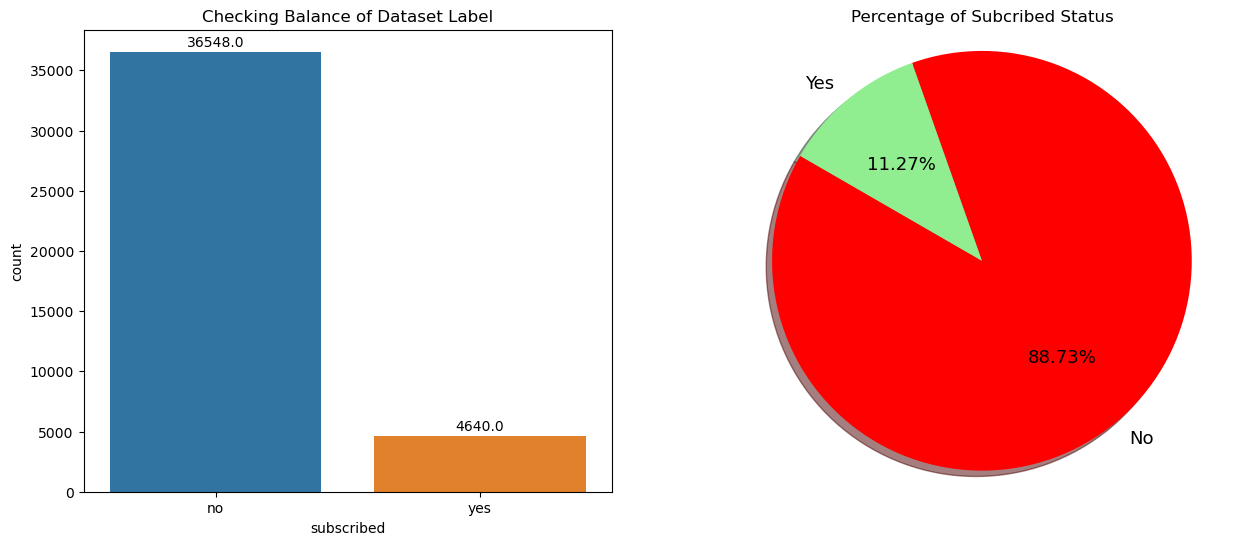

In [75]:
# mengecek keseimbangan jumlah label/output dataset
plt.rcParams['figure.figsize']=(15,6)
plt.subplot(121)
plt.title("Checking Balance of Dataset Label")
ax = sns.countplot(x='subscribed', data=df)
for i in ax.patches:
    ax.annotate(format(i.get_height(),'0.1f'), (i.get_x() + i.get_width()/2.,i.get_height()),
               ha='center', va='center', xytext=(0,7), textcoords='offset points')
    
plt.subplot(122)
plt.title("Percentage of Subcribed Status")
subscribed_values_count = df['subscribed'].value_counts()
subscribed_size = subscribed_values_count.values.tolist()
subscribed_labels = 'No', 'Yes'
colors=['red', 'lightgreen']
pcs, texts, autotexts = plt.pie(subscribed_size, labels=subscribed_labels, colors=colors,
                             autopct='%2.2f%%', shadow=True, startangle=150)

for text, autotext in zip(texts, autotexts):
    text.set_fontsize(13)
    autotext.set_fontsize(13)

plt.axis('equal')
plt.show()
    




Dari visualisasi data diatas dapat kita lihat bahwa jumlah label dataset yang digunakan adalah imbalanced, hal ini secara implisit akan mempengaruhi kinerja model yang akan dihasilkan. oleh karena itu harus dilakukan proses balancing data.

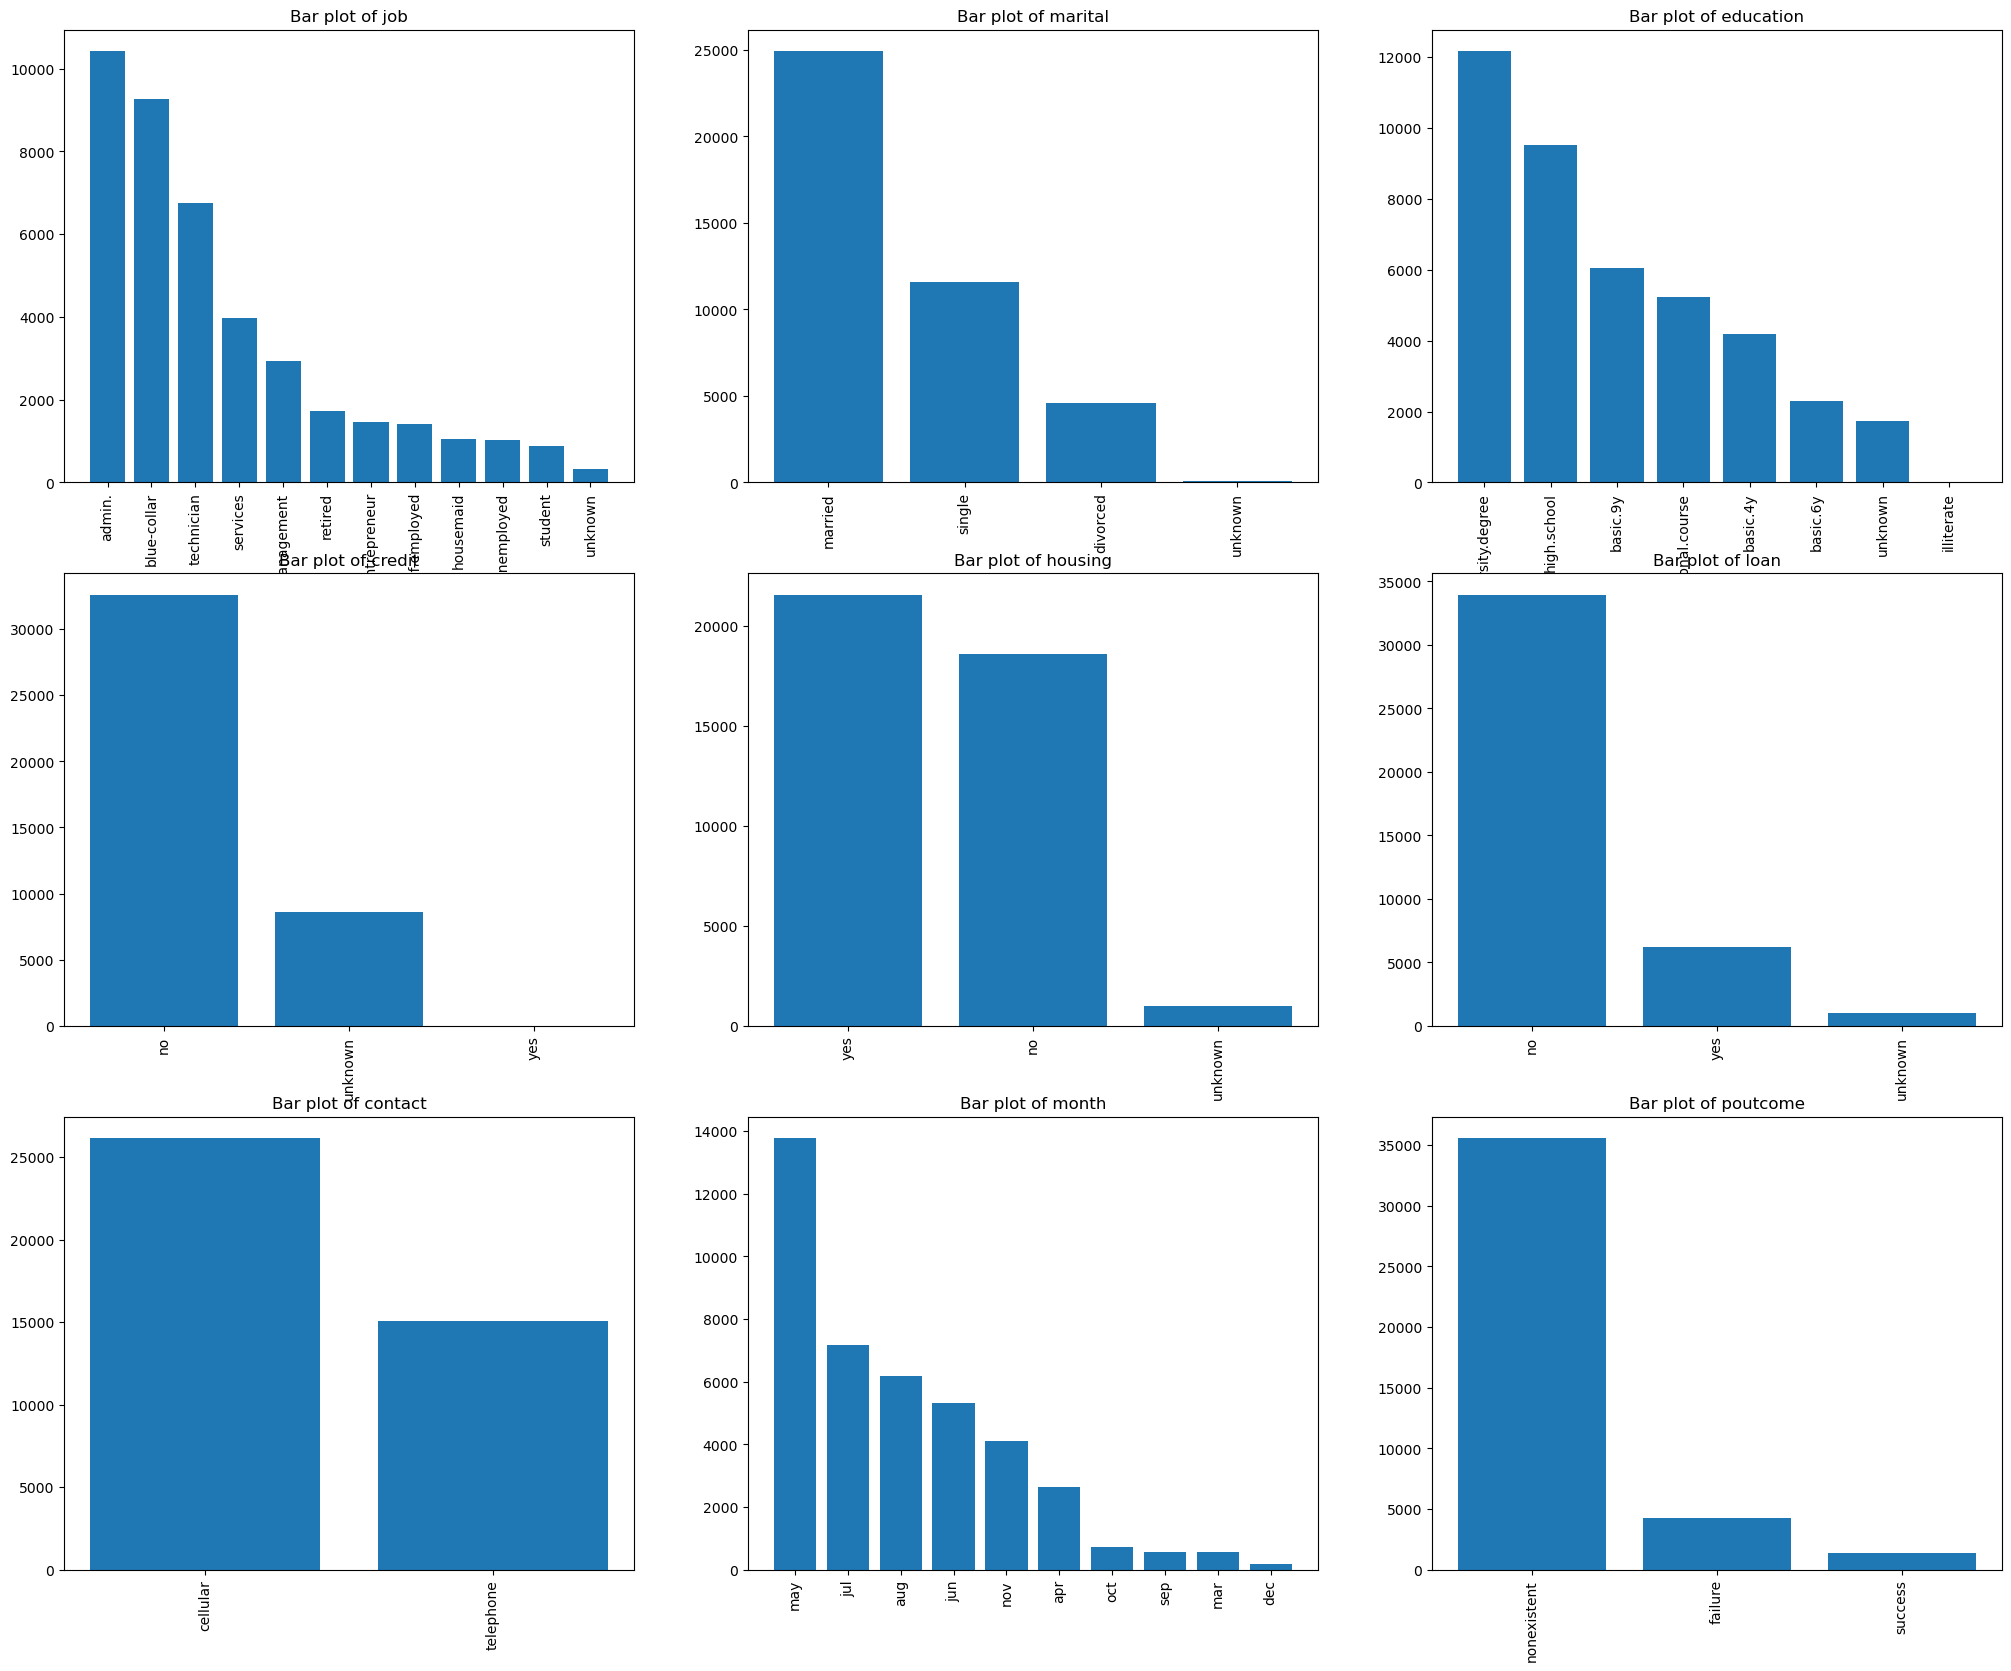

In [76]:
# Categorical columns exploration

categorical_cols = ['job','marital','education','credit','housing',
                   'loan','contact','month','poutcome']
fig, ax = plt.subplots(3,3, sharex=False, sharey=False, figsize=(25,20))
count = 0
for cat_col in categorical_cols:
    value_count = df[cat_col].value_counts()
    ax_x = count//3
    ax_y = count%3
    x_range = np.arange(0, len(value_count))
    ax[ax_x, ax_y].bar(x_range, value_count.values, tick_label=value_count.index)
    ax[ax_x, ax_y].set_title(f"Bar plot of {cat_col}")
    
    for i in ax[ax_x, ax_y].get_xticklabels():
        i.set_rotation(90)
    
    count+=1
plt.show()
    

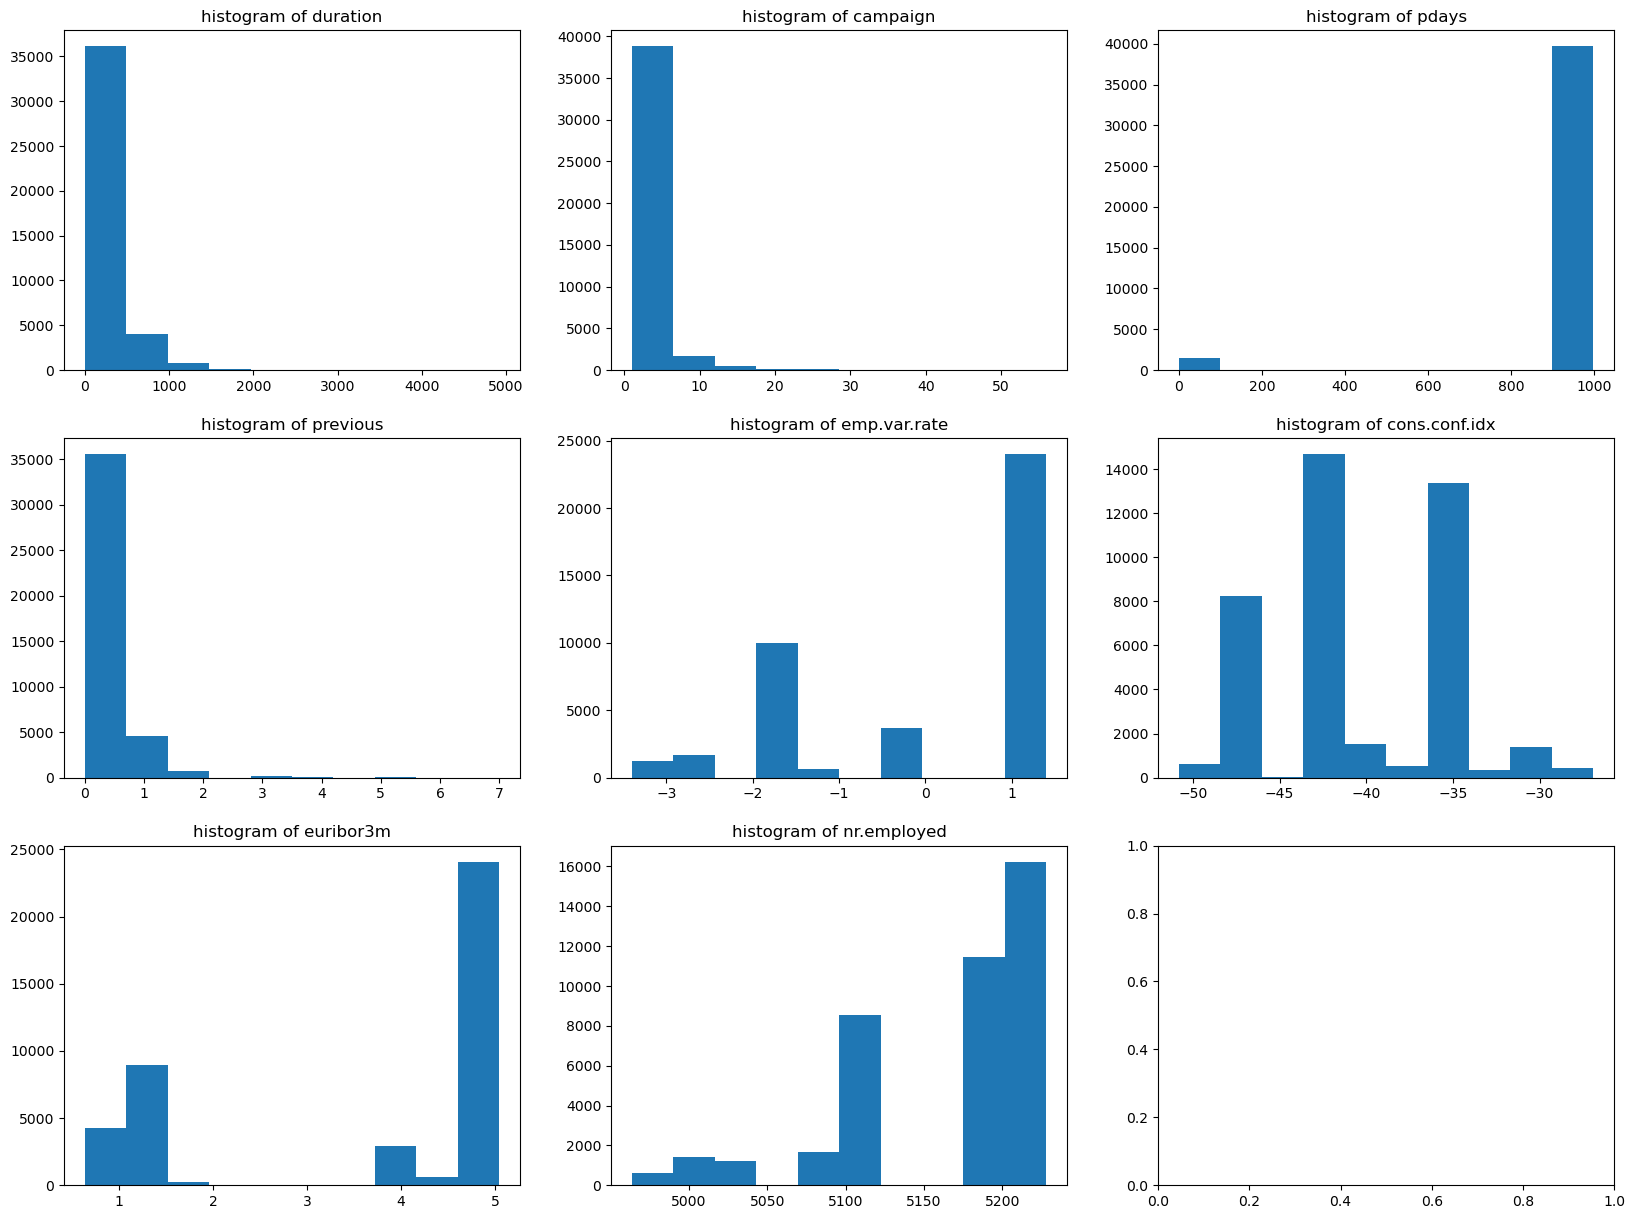

In [77]:
# Numerical columns exploration
num_cols = ['duration','campaign','pdays','previous','emp.var.rate',
            'cons.conf.idx','euribor3m','nr.employed']

fig, ax = plt.subplots(3,3, sharex=False, sharey=False, figsize=(20,15))
count = 0
for num_col in num_cols:
    ax_x = count//3
    ax_y = count%3
    
    ax[ax_x, ax_y].hist(df[num_col])
    ax[ax_x, ax_y].set_title(f"histogram of {num_col}")
    count+=1
plt.show()


In [78]:
df['subscribed'].replace({'yes':1, 'no':0}, inplace=True)

In [79]:
corr = df.corr()
print(corr['subscribed'].sort_values(axis=0, ascending=True))

nr.employed      -0.354678
pdays            -0.324914
euribor3m        -0.307771
emp.var.rate     -0.298334
cons.price.idx   -0.136211
campaign         -0.066357
age               0.030399
cons.conf.idx     0.054878
previous          0.230181
duration          0.405274
subscribed        1.000000
Name: subscribed, dtype: float64


In [80]:
# drop features yang memiliki korelasi lebih sedikit dan tidak relevan dengan proses klasifikasi
df.drop(columns=['nr.employed','pdays','euribor3m','emp.var.rate',
    'cons.price.idx','day_of_week','cons.conf.idx','contact','month'],axis=0, inplace=True)

In [81]:
df

,age,job,marital,education,credit,housing,loan,duration,campaign,previous,poutcome,subscribed
0,56,housemaid,married,basic.4y,no,no,no,261,1,0,nonexistent,0
1,57,services,married,high.school,unknown,no,no,149,1,0,nonexistent,0
2,37,services,married,high.school,no,yes,no,226,1,0,nonexistent,0
3,40,admin.,married,basic.6y,no,no,no,151,1,0,nonexistent,0
4,56,services,married,high.school,no,no,yes,307,1,0,nonexistent,0
...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,retired,married,professional.course,no,yes,no,334,1,0,nonexistent,1
41184,46,blue-collar,married,professional.course,no,no,no,383,1,0,nonexistent,0
41185,56,retired,married,university.degree,no,yes,no,189,2,0,nonexistent,0
41186,44,technician,married,professional.course,no,no,no,442,1,0,nonexistent,1


In [82]:
encoder = LabelEncoder()
col = ['marital','credit','housing','loan']

for i in col:
    df[i] = encoder.fit_transform(df[i])

In [83]:
# Encoding
cat_features = ['job','marital','education','credit','housing','loan','poutcome']
df = pd.get_dummies(df, columns=cat_features, drop_first=True)
df

,age,duration,campaign,previous,subscribed,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,...,education_university.degree,education_unknown,credit_1,credit_2,housing_1,housing_2,loan_1,loan_2,poutcome_nonexistent,poutcome_success
0,56,261,1,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,1,0
1,57,149,1,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0
2,37,226,1,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,1,0
3,40,151,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,56,307,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,334,1,0,1,0,0,0,0,1,...,0,0,0,0,0,1,0,0,1,0
41184,46,383,1,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
41185,56,189,2,0,0,0,0,0,0,1,...,1,0,0,0,0,1,0,0,1,0
41186,44,442,1,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [84]:
#Assign variable features dan label
X = df.drop(columns='subscribed', axis=1).values
y = df['subscribed'].values

In [85]:
#splitting data scaling
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=103)


In [86]:
ss = StandardScaler()
X_train = ss.fit_transform(X_train)
X_test = ss.fit_transform(X_test)

In [87]:
# Logistik Regression
from sklearn.linear_model import LogisticRegression
model_lr = LogisticRegression()
model_lr.fit(X_train, y_train)
ypred = model_lr.predict(X_test)
print("Accuracy: ",metrics.accuracy_score(y_test, ypred))
print(metrics.confusion_matrix(y_test, ypred))
print(metrics.classification_report(y_test, ypred))

Accuracy:  0.9076636724123979
[[10731   238]
 [  903   485]]
              precision    recall  f1-score   support

           0       0.92      0.98      0.95     10969
           1       0.67      0.35      0.46      1388

    accuracy                           0.91     12357
   macro avg       0.80      0.66      0.70     12357
weighted avg       0.89      0.91      0.89     12357



In [88]:
# SUPPORT VECTOR MACHINES (SVM)
from sklearn import svm
svm_model = svm.SVC()
svm_model.fit(X_train, y_train)
ypred2=svm_model.predict(X_test)
print("Acc: ", metrics.accuracy_score(y_test, ypred2))
print(metrics.confusion_matrix(y_test, ypred2))
print(metrics.classification_report(y_test, ypred2))


Acc:  0.902889050740471
[[10801   168]
 [ 1032   356]]
              precision    recall  f1-score   support

           0       0.91      0.98      0.95     10969
           1       0.68      0.26      0.37      1388

    accuracy                           0.90     12357
   macro avg       0.80      0.62      0.66     12357
weighted avg       0.89      0.90      0.88     12357



In [89]:
# K-NEAREST NEIGHBOR ALGORITHM
from sklearn.neighbors import KNeighborsClassifier
KNN = KNeighborsClassifier()
KNN.fit(X_train, y_train)
pred_cv5= KNN.predict(X_test)
print("Accuracy score K-Nearest: ", metrics.accuracy_score(y_test, pred_cv5))
matrix5 = metrics.confusion_matrix(y_test, pred_cv5)
print(matrix5)
print(metrics.classification_report(y_test, pred_cv5))

C:\Users\USER\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


Accuracy score K-Nearest:  0.8951201747997086
[[10654   315]
 [  981   407]]
              precision    recall  f1-score   support

           0       0.92      0.97      0.94     10969
           1       0.56      0.29      0.39      1388

    accuracy                           0.90     12357
   macro avg       0.74      0.63      0.66     12357
weighted avg       0.88      0.90      0.88     12357



In [90]:
# DECISION TREE
dt = DecisionTreeClassifier()

# fit model into training data
dt.fit(X_train,y_train)

# get y prediction
y_pred_dt = dt.predict(X_test)

# print score
print("Accuracy score Decision Tree = ", metrics.accuracy_score(y_test,y_pred_dt))
print(metrics.classification_report(y_test,y_pred_dt))

# confusion matrix
print(metrics.confusion_matrix(y_test,y_pred_dt))

Accuracy score Decision Tree =  0.8620215262604192
              precision    recall  f1-score   support

           0       0.93      0.92      0.92     10969
           1       0.39      0.43      0.41      1388

    accuracy                           0.86     12357
   macro avg       0.66      0.67      0.67     12357
weighted avg       0.87      0.86      0.86     12357

[[10058   911]
 [  794   594]]


#### Akurasi setelah melakukan handling Imbalanced Dataset


In [91]:
from imblearn.over_sampling import SMOTE
smote = SMOTE()

In [92]:
X_train_smote, y_train_smote= smote.fit_resample(X_train.astype('float'),y_train)

In [93]:
from collections import Counter
print("Before oversampling: ",Counter(y_train))
print("After oversampling: ",Counter(y_train_smote))

Before oversampling:  Counter({0: 25579, 1: 3252})
After oversampling:  Counter({0: 25579, 1: 25579})


In [94]:
# Logistik Regression
from sklearn.linear_model import LogisticRegression
model_lr2 = LogisticRegression()
model_lr2.fit(X_train_smote, y_train_smote)
ypred_smote = model_lr2.predict(X_test)
print("Accuracy Score Logistik Regression : ",metrics.accuracy_score(y_test, ypred_smote))
print(metrics.confusion_matrix(y_test, ypred_smote))
print(metrics.classification_report(y_test, ypred_smote))

Accuracy Score Logistik Regression :  0.8396050821396779
[[9299 1670]
 [ 312 1076]]
              precision    recall  f1-score   support

           0       0.97      0.85      0.90     10969
           1       0.39      0.78      0.52      1388

    accuracy                           0.84     12357
   macro avg       0.68      0.81      0.71     12357
weighted avg       0.90      0.84      0.86     12357



In [95]:
# SUPPORT VECTOR MACHINES (SVM)
from sklearn import svm
svm_model = svm.SVC()
svm_model.fit(X_train_smote, y_train_smote)
ypred2=svm_model.predict(X_test)
print("Accuracy Score SVM: ", metrics.accuracy_score(y_test, ypred2))
print(metrics.confusion_matrix(y_test, ypred2))
print(metrics.classification_report(y_test, ypred2))

Accuracy Score SVM:  0.8243101076313021
[[9109 1860]
 [ 311 1077]]
              precision    recall  f1-score   support

           0       0.97      0.83      0.89     10969
           1       0.37      0.78      0.50      1388

    accuracy                           0.82     12357
   macro avg       0.67      0.80      0.70     12357
weighted avg       0.90      0.82      0.85     12357



In [96]:
# K-NEAREST NEIGHBOR ALGORITHM
from sklearn.neighbors import KNeighborsClassifier
KNN = KNeighborsClassifier()
KNN.fit(X_train_smote, y_train_smote)
pred_cv5= KNN.predict(X_test)
print("Accuracy score K-Nearest: ", metrics.accuracy_score(y_test, pred_cv5))
matrix5 = metrics.confusion_matrix(y_test, pred_cv5)
print(matrix5)
print(metrics.classification_report(y_test, pred_cv5))

C:\Users\USER\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


Accuracy score K-Nearest:  0.8084486525855791
[[9111 1858]
 [ 509  879]]
              precision    recall  f1-score   support

           0       0.95      0.83      0.89     10969
           1       0.32      0.63      0.43      1388

    accuracy                           0.81     12357
   macro avg       0.63      0.73      0.66     12357
weighted avg       0.88      0.81      0.83     12357



In [101]:
# DECISION TREE
dt = DecisionTreeClassifier()

# fit model into training data
dt.fit(X_train_smote, y_train_smote)

# get y prediction
y_pred_dt = dt.predict(X_test)

# print score
print("Accuracy score Decision Tree = ", metrics.accuracy_score(y_test,y_pred_dt))
print(metrics.classification_report(y_test,y_pred_dt))

# confusion matrix
print(metrics.confusion_matrix(y_test,y_pred_dt))

Accuracy score Decision Tree =  0.3978311887998705
              precision    recall  f1-score   support

           0       0.98      0.33      0.49     10969
           1       0.15      0.94      0.26      1388

    accuracy                           0.40     12357
   macro avg       0.56      0.64      0.38     12357
weighted avg       0.89      0.40      0.47     12357

[[3606 7363]
 [  78 1310]]


In [98]:
df.head()

,age,duration,campaign,previous,subscribed,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,...,education_university.degree,education_unknown,credit_1,credit_2,housing_1,housing_2,loan_1,loan_2,poutcome_nonexistent,poutcome_success
0,56,261,1,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,1,0
1,57,149,1,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0
2,37,226,1,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,1,0
3,40,151,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,56,307,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,1,0


In [99]:
print("Accuracy Logistik Regression pada imbalanced dataset : ",
      metrics.accuracy_score(y_test, ypred))
print(metrics.confusion_matrix(y_test, ypred))
recall1 = (10731)/(10731+238)
precision1= 10731/(10731+903)
print("precision : ", precision1)
print("recall: ",recall1)
print(metrics.classification_report(y_test, ypred))
print("Accuracy Logistik Regression setelah melakukan balancing dataset: ",
     metrics.accuracy_score(y_test, ypred_smote))
print(metrics.confusion_matrix(y_test, ypred_smote))
recall2= 9282/(9282+1687)
precision2 = 9282/(9282+308)
print("precision: ",precision2)
print("recall: ", recall2)
print(metrics.classification_report(y_test, ypred_smote))

Accuracy Logistik Regression pada imbalanced dataset :  0.9076636724123979
[[10731   238]
 [  903   485]]
precision :  0.9223826714801444
recall:  0.9783024888321634
              precision    recall  f1-score   support

           0       0.92      0.98      0.95     10969
           1       0.67      0.35      0.46      1388

    accuracy                           0.91     12357
   macro avg       0.80      0.66      0.70     12357
weighted avg       0.89      0.91      0.89     12357

Accuracy Logistik Regression setelah melakukan balancing dataset:  0.8396050821396779
[[9299 1670]
 [ 312 1076]]
precision:  0.9678832116788321
recall:  0.8462029355456286
              precision    recall  f1-score   support

           0       0.97      0.85      0.90     10969
           1       0.39      0.78      0.52      1388

    accuracy                           0.84     12357
   macro avg       0.68      0.81      0.71     12357
weighted avg       0.90      0.84      0.86     12357



Untuk Hasil akhiir Classification algoritma Logistic Regression memiliki performa yang lebih baik dari yang algoritma yang lain seperti SVM, KNN, dan DT. Hasil classification diatas dapat dilihat bahwa proses klasifikasi dengan dataset imbalanced menghasilkan accuracy sebesar 0.91. Serta hasil klasifikasi setelah dilakukan balancing dataset menggunakan metode oversampling SMOTE menghasilkan accuracy sebesar 0.84.

## Projects Rubric
Code Review

Criteria
Meet Expectations

1 Logistic Regression
Mengimplementasikan Logistic Regression Dengan Scikit-Learn

2 K-Nearest Neighbors
Mengimplementasikan K-Nearest Neighbors Dengan Scikit-Learn

3 Support Vector Machine
Mengimplementasikan Support Vector Machine Dengan Scikit-Learn

4 Decision Tree
Mengimplementasikan Decision Tree Dengan Scikit-Learn

5 Random Forest
Mengimplementasikan Random Forest Dengan Scikit-Learn

6 Naive Bayes
Mengimplementasikan Naive Bayes Dengan Scikit-Learn

7 Confusion Matrix
Mengimpelentasikan Confusion Matrix Regression Dengan Scikit-Learn

8 Visualization
Menganalisa Data Menggunakan Setidaknya 2 Tipe Grafik/Plot.

9 Preprocessing
Melakukan Preproses Dataset Sebelum Melakukan Penelitian Lebih Dalam.

10 Apakah Kode Berjalan Tanpa Ada Eror?
Kode Berjalan Tanpa Ada Eror. Seluruh Kode Berfungsi Dan Dibuat Dengan Benar.
Readibility

Criteria
Meet Expectations

11 Tertata Dengan Baik
Semua Cell Di Notebook Terdokumentasi Dengan Baik Dengan Markdown Pada Tiap Cell Untuk Penjelasan Kode.
Analysis

Criteria
Meet Expectations

12 Algorithm Analysis
Student Menjelaskan Alasan Mengapa Memilih Menggunakan Algoritma Tersebut Untuk Membuat Model.